# Intro

In this notebook we'll take a look at some visualizations of temperature changes across the world. The temperature measurements found here are relative to a baseline computed from the temperatures between 1951 - 1980. For example a value of 2 indicates a 2°C increase from baseline of the area of interest. Based on current climate research we should expect to see something between a linear and expontial trend upwards.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

# Primary Cleaning

In [3]:
df = pd.read_csv('dataset/Environment_Temperature_change.csv', encoding='latin-1')
df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('y', '')
df.drop(columns=['area code', 'element code', 'months code', 'unit'], inplace = True)
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
# df.months.unique()

In [6]:
# df.area.unique()

In [7]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

In [8]:
seasons_replace = {'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug': 'Summer', 'Sep\x96Oct\x96Nov': 'Fall', }
df.replace(seasons_replace, inplace=True)

In [9]:
df.months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Winter',
       'Spring', 'Summer', 'Fall', 'Meteorological year'], dtype=object)

# Countries Visualization

These functions will give us region specific dataframes for easy analysis. 

In [10]:
def country_df(df, country):
    dfn = df[(df['element'] == 'Temperature change') & (df['area'] == country)]
    dfn = dfn.set_index('months').transpose()[2:]
    dfn['year'] = dfn.index
    dfn.reset_index(drop=True, inplace=True)
    dfn.index.names = [country]
    dfn = dfn.astype('float')
    return dfn

In [11]:
def seasons_df(df, country):
    dfn = df[(df['element'] == 'Temperature change') & (df['area'] == country)]
    dfn.rename(columns={'months': 'seasons'}, inplace=True)
    dfn = dfn.set_index('seasons').transpose()[2:]
    dfn['year'] = dfn.index
    dfn.drop(columns=months, inplace=True)
    dfn.reset_index(drop=True, inplace=True)
    dfn.index.names = [country]
    dfn = dfn.astype('float')
    return dfn

In [12]:
usa = country_df(df, 'United States of America')
usa.head()

months,January,February,March,April,May,June,July,August,September,October,November,December,Winter,Spring,Summer,Fall,Meteorological year,year
United States of America,,,,,,,,,,,,,,,,,,
0,0.943,1.215,0.656,-1.210,-0.348,0.339,-0.313,0.190,-0.467,-0.405,-0.692,-1.652,0.750,-0.301,0.072,-0.521,0.000,1961.0
1,-0.771,1.425,-1.082,0.409,0.671,-0.306,-0.515,0.203,-0.511,1.076,0.778,0.463,-0.333,-0.001,-0.206,0.448,-0.023,1962.0
2,-1.170,0.577,1.400,0.399,0.503,-0.165,-0.089,-0.072,0.814,2.218,0.141,-1.208,-0.043,0.767,-0.109,1.058,0.418,1963.0
3,0.901,-1.032,-1.379,-0.197,0.023,-0.158,0.363,-0.645,-0.411,0.018,0.307,-1.336,-0.446,-0.518,-0.147,-0.029,-0.285,1964.0
4,0.747,-1.287,-1.034,0.612,-0.127,-0.980,-0.622,-0.576,-1.037,-0.226,1.567,1.053,-0.625,-0.183,-0.726,0.101,-0.358,1965.0


This function will let us easily view temperature trends in a country for any of the provided time periods.

In [15]:
def country_plot(data, period):
    p = plt.figure(figsize=(8,8))
    sns.regplot(data=data, x='year', y=period, fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75})
    plt.ylabel('∆ °C', rotation=0)
    plt.title(data.index.name+" in "+period)

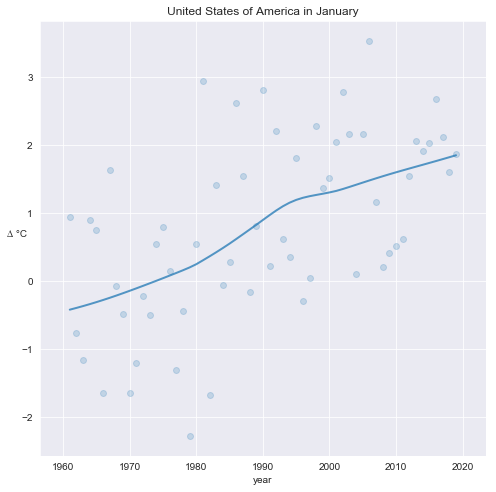

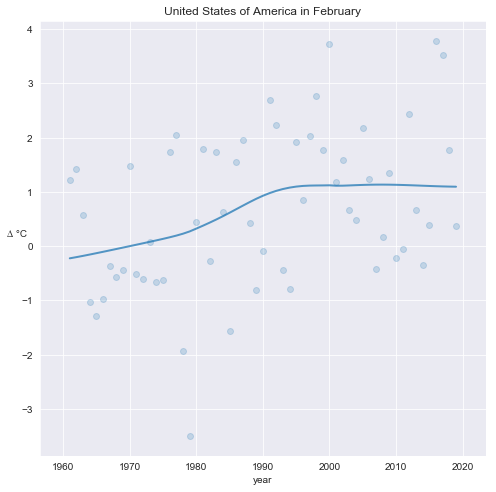

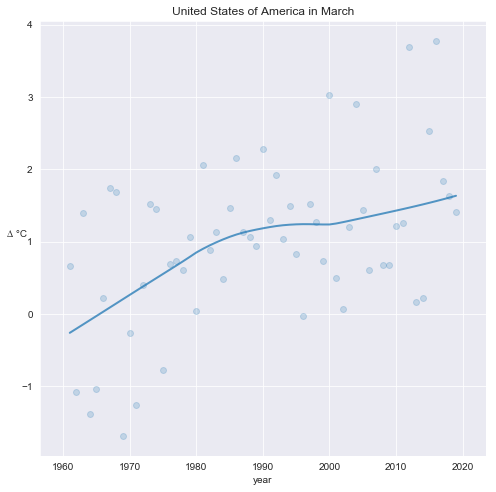

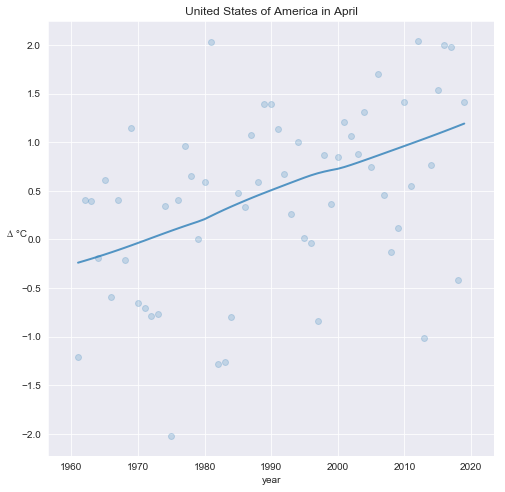

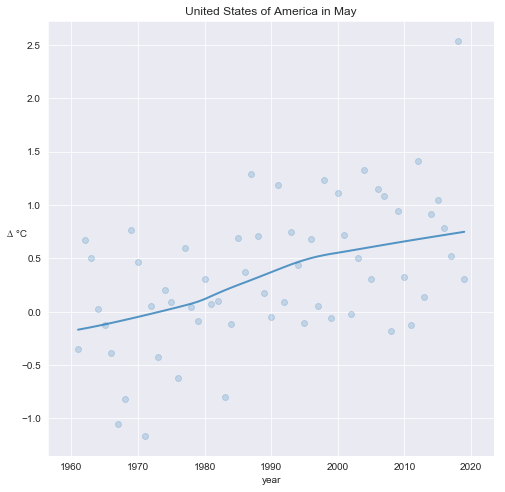

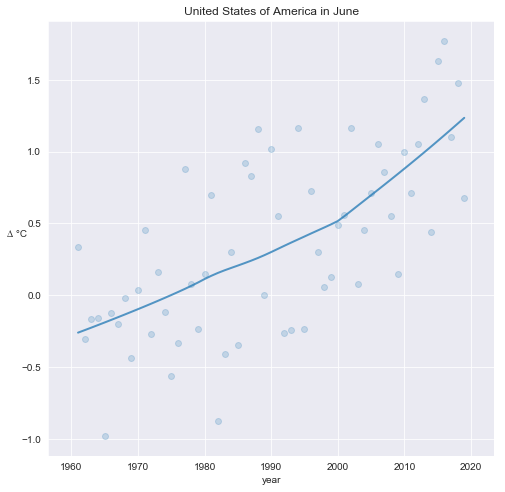

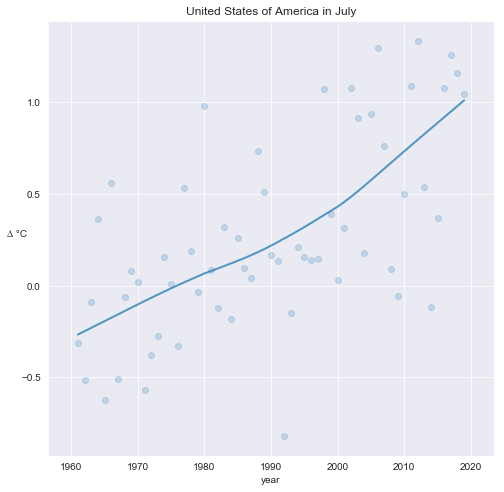

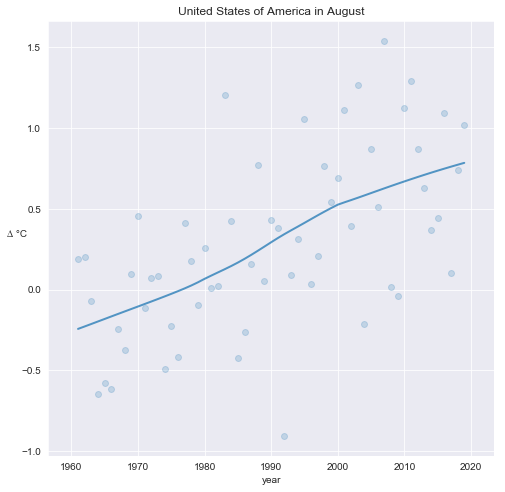

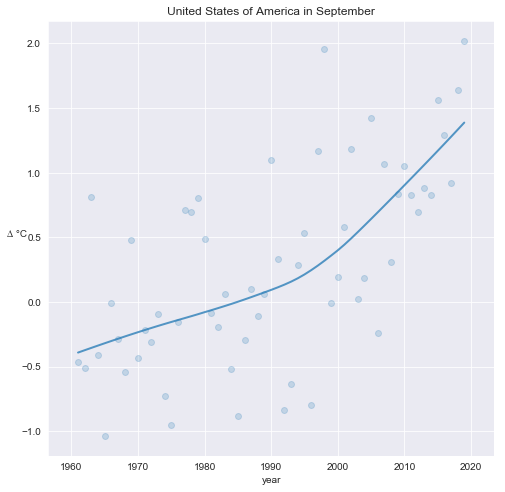

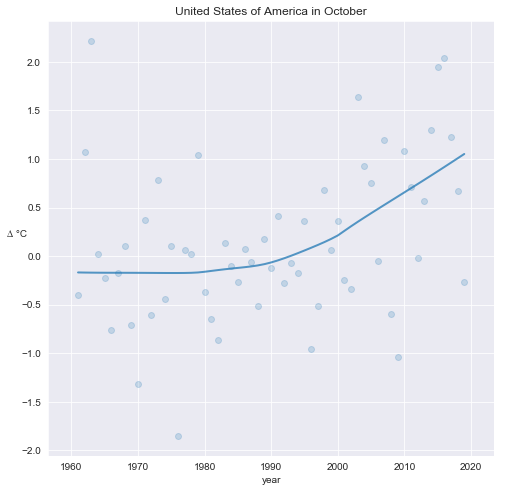

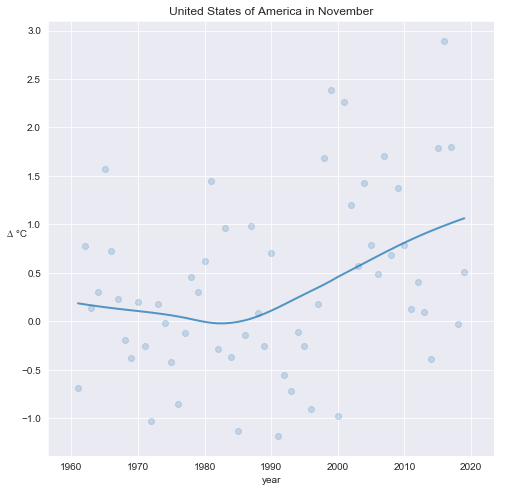

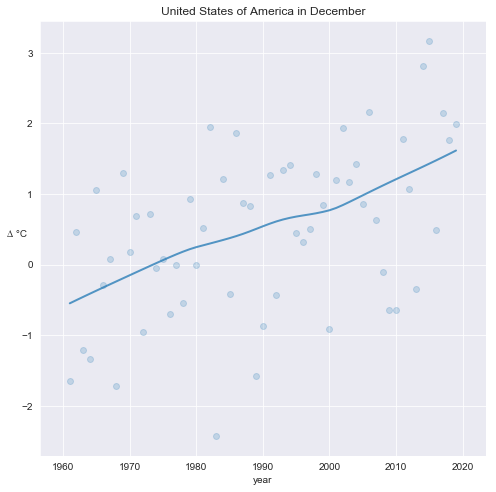

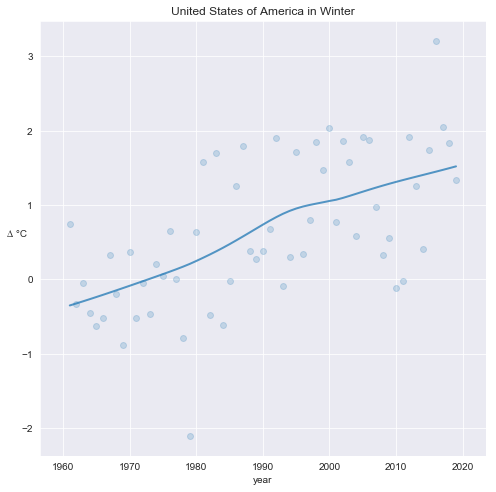

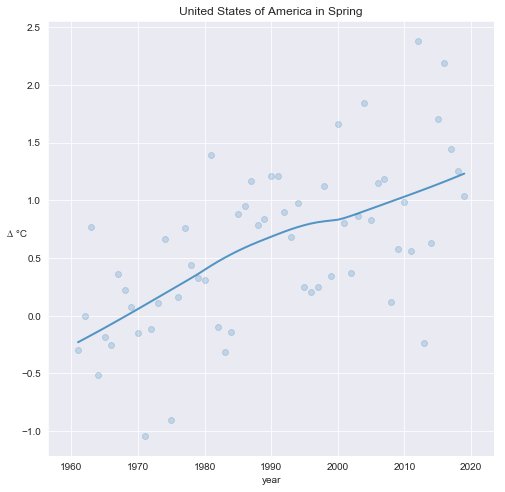

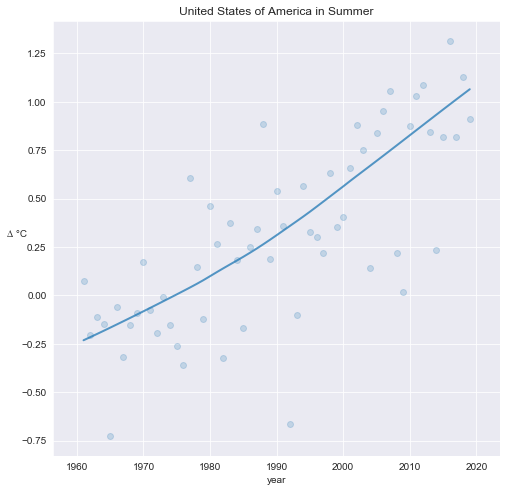

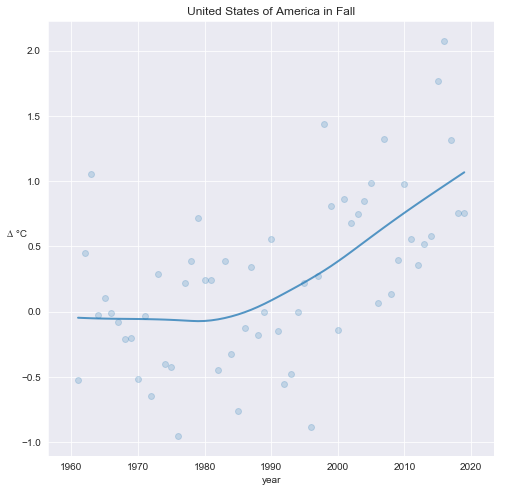

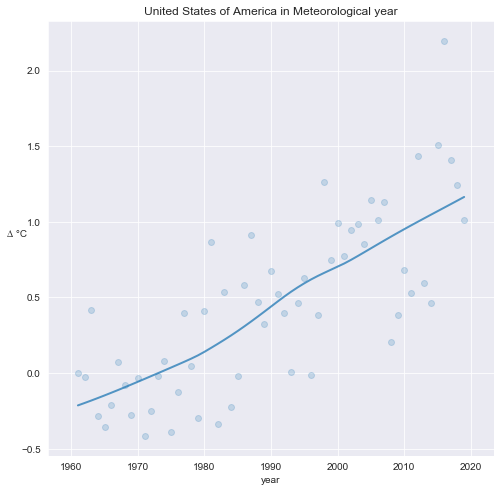

In [16]:
for month in df.months.unique():
    country_plot(usa, month)

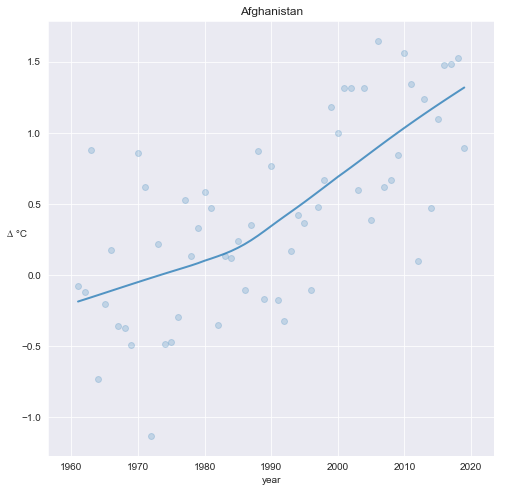

In [21]:
afg = country_df(df, 'Afghanistan')
country_plot(afg, 'Meteorological year')

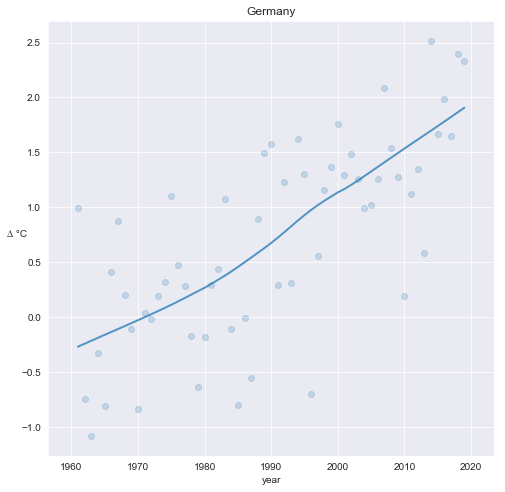

In [22]:
ger = country_df(df, 'Germany')
country_plot(ger, 'Meteorological year')

As expected we see a clear increase in temperature over the years in our sampled countries. 

# Continents Visualization

Let's zoom out and take a look at the continental temperature changes. 

In [23]:
africa = seasons_df(df, 'Africa')
asia = seasons_df(df, 'Asia')
europe = seasons_df(df, 'Europe')
north_america = seasons_df(df, 'Northern America')
south_america = seasons_df(df, 'South America')
australia = seasons_df(df, 'Australia')
antarctica = seasons_df(df, 'Antarctica')

C:\Users\triplem\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
continents_str=["Africa","Asia","Europe","Northern America","South America","Australia","Antarctica"]
continents=[africa, asia, europe, north_america, south_america, australia, antarctica]

In [25]:
 africa.head()

seasons,Winter,Spring,Summer,Fall,Meteorological year,year
Africa,,,,,,
0,0.036,0.170,-0.032,-0.243,-0.017,1961.0
1,-0.414,-0.011,-0.021,0.287,-0.040,1962.0
2,0.393,-0.455,0.118,0.198,0.064,1963.0
3,0.110,0.231,-0.434,-0.519,-0.153,1964.0
4,-0.160,-0.342,-0.111,-0.174,-0.197,1965.0


In [26]:
cont_yearly = pd.concat(continents, axis=1, ignore_index=False)
cont_yearly.drop(columns=seasons, axis=1, inplace=True)
cont_yearly.set_index(africa['year'], inplace=True)
cont_yearly.drop('year', axis=1, inplace=True)
cont_yearly.columns = continents_str
cont_yearly.head()

,Africa,Asia,Europe,Northern America,South America,Australia,Antarctica
year,,,,,,,
1961.0,-0.017,0.049,0.874,0.017,0.116,0.151,0.280
1962.0,-0.040,-0.008,0.300,-0.058,-0.139,0.123,-0.227
1963.0,0.064,0.266,0.103,0.372,0.139,-0.114,0.135
1964.0,-0.153,-0.166,-0.523,-0.285,-0.217,-0.022,-0.366
1965.0,-0.197,-0.033,-0.430,-0.594,-0.015,0.127,-0.099


In [27]:
sns.set_palette(sns.color_palette('muted', 7))
colors = sns.color_palette('muted')

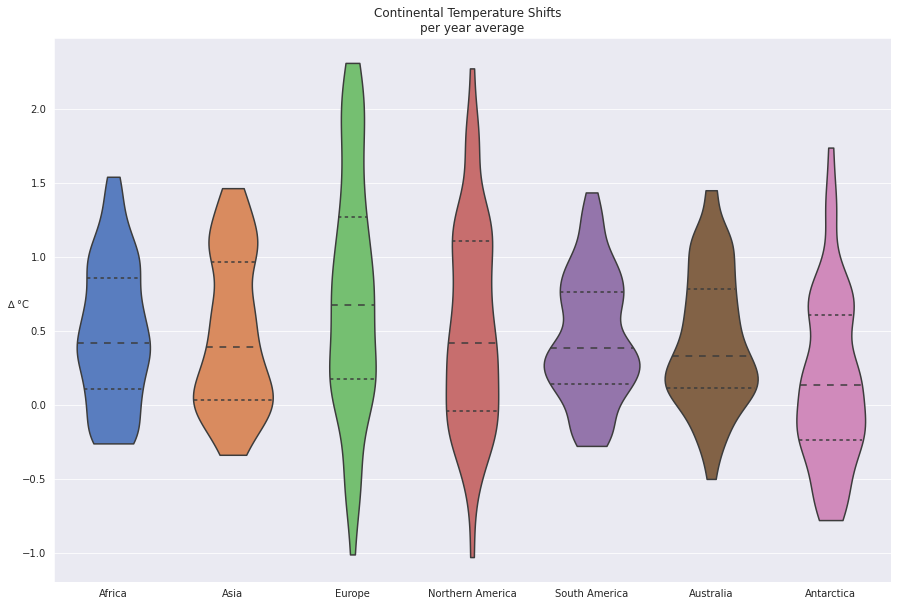

In [21]:
violins = plt.figure(figsize=(15,10))
sns.violinplot(data=cont_yearly, inner='quartile', cut=0, bw=0.3)  
plt.ylabel('∆ °C', rotation=0)
plt.title('Continental Temperature Shifts  \nper year average')
plt.show()

According to our plot, all continents have a mean temperature increase above 0, with some quartiles reaching near or above 1. 

Let's look at the continents per season.

In [22]:
def continent_season_plot(season, axes=None, subplot=False):
    if subplot == False:
        p = plt.figure(figsize=(10,10))
    for con, c in list(zip(continents, colors)):
        sns.regplot(ax=axes, data=con, x='year', y=season, fit_reg=True, lowess=True, label=con.index.name, 
                    scatter_kws={'alpha':0.2}, ci=None, color=c, line_kws={'lw':2, 'alpha':0.75})
    if subplot == False:
        plt.ylabel('∆ °C', rotation=0)
        plt.title(f'{season} ∆ Continental Temperatures')
        plt.legend(loc='best', frameon=False)
    else:
        axes.set_ylabel('∆ °C', rotation=0)
        axes.set_title(f'{season} ∆ Continental Temperatures')
        axes.legend(loc='upper left', frameon=True)

In [37]:
df.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


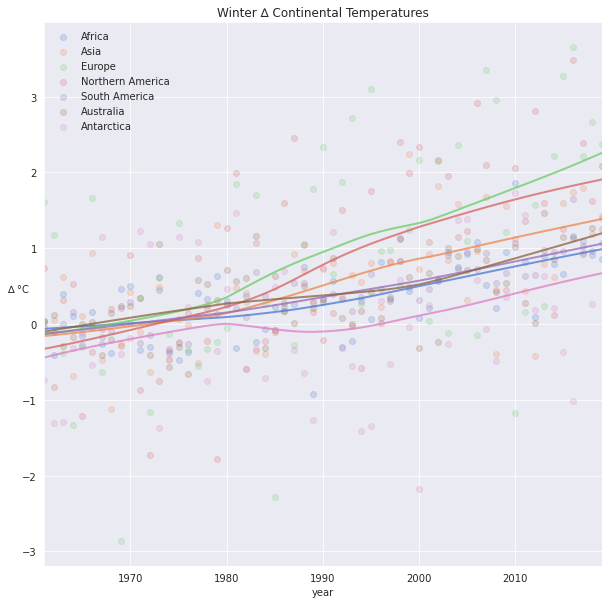

In [23]:
continent_season_plot('Winter')

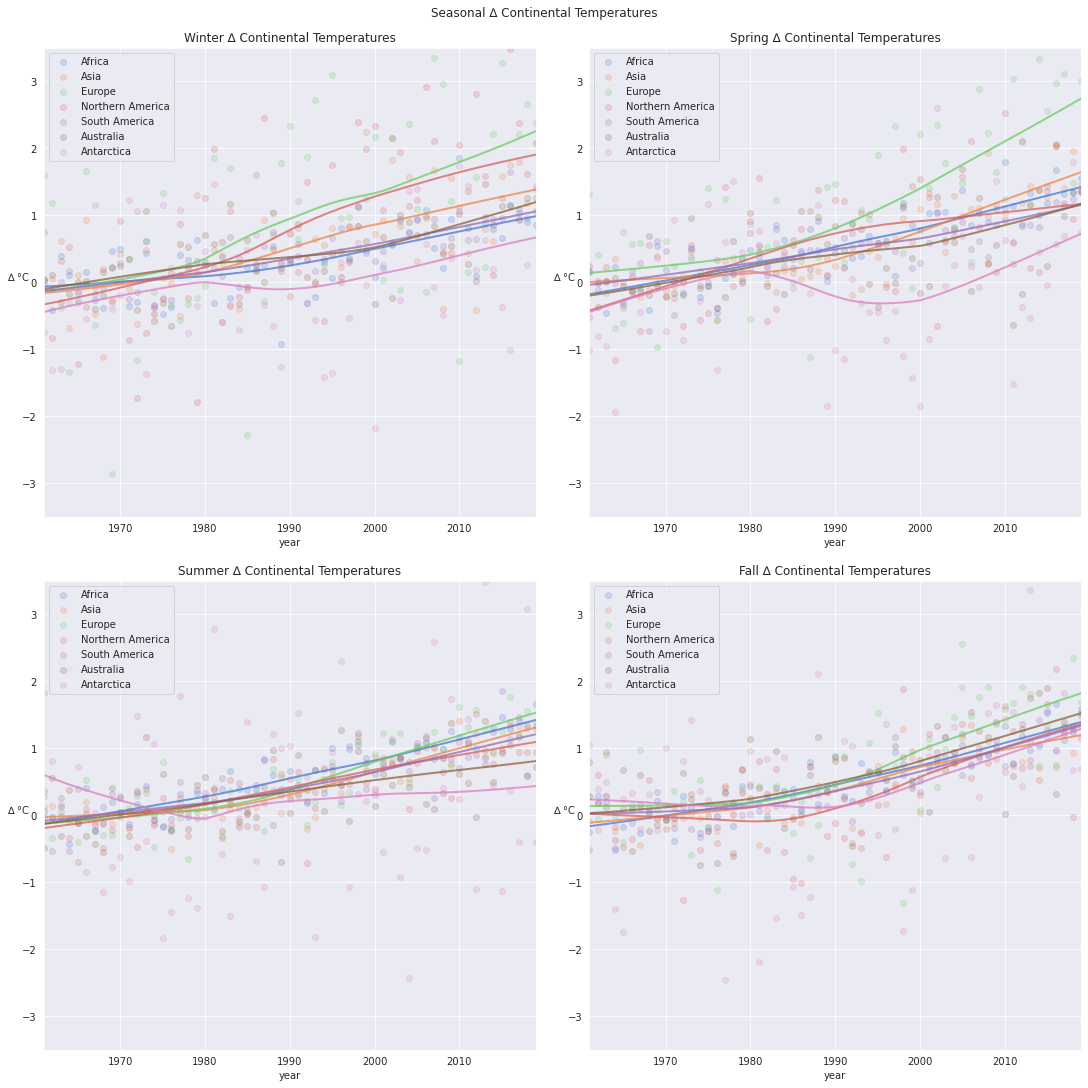

In [24]:
fig, ax = plt.subplots(2,2, constrained_layout=True, figsize=(15,15))
fig.suptitle('Seasonal ∆ Continental Temperatures')
continent_season_plot('Winter', ax[0,0], subplot=True)
ax[0,0].set_ylim(-3.5,3.5)
continent_season_plot('Spring', ax[0,1], subplot=True)
ax[0,1].set_ylim(-3.5,3.5)
continent_season_plot('Summer', ax[1,0], subplot=True)
ax[1,0].set_ylim(-3.5,3.5)
continent_season_plot('Fall', ax[1,1], subplot=True)
ax[1,1].set_ylim(-3.5,3.5)
plt.show()

Although the degree of increase varies between continents, it's clear that all have seen increasing temperatures in all seasons. Most appear to be consistently above 1°C in recent years.

# World Visualization

Now let's view the world as a whole. 

In [25]:
world = sum(continents) / 7
world.index.name = 'world'
world.head()

seasons,Winter,Spring,Summer,Fall,Meteorological year,year
world,,,,,,
0,0.238571,0.072857,0.306429,0.222000,0.210000,1961.0
1,-0.187143,-0.124000,0.082286,0.198857,-0.007000,1962.0
2,-0.091000,-0.183714,0.362571,0.463286,0.137857,1963.0
3,-0.243429,-0.449429,0.159143,-0.456143,-0.247429,1964.0
4,-0.281429,-0.132571,-0.041857,-0.253000,-0.177286,1965.0


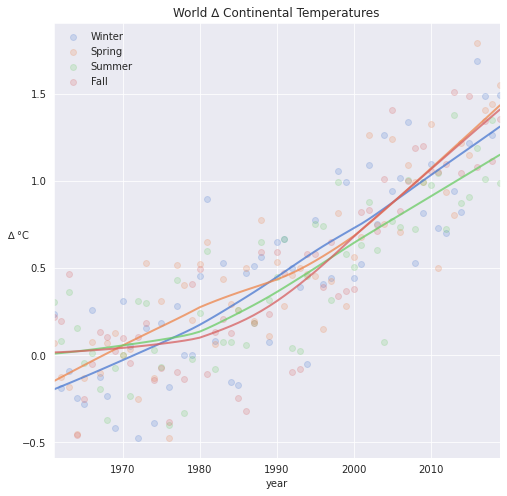

In [26]:
plt.figure(figsize=(8,8))
for s in seasons:
    sns.regplot(data=world, x='year', y=s, fit_reg=True, lowess=True, label=s, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75})
plt.gca().set_ylabel('∆ °C', rotation=0)
plt.gca().set_title('World ∆ Continental Temperatures')
plt.legend(loc='best', frameon=False)
plt.show()

As expected we see a clear increase for the world as a whole. 